### //// utils ////////////////////////////////////////////////////////////////////////

#### `string.ascii_letters `

In [1]:
import string
# alphabet small + capital letters + " .,;'"
ALL_LETTERS = string.ascii_letters + " .,;'"
N_LETTERS = len(ALL_LETTERS)

print(ALL_LETTERS)
print(N_LETTERS)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'
57


#### `unicode_to_ascii`

In [2]:
import unicodedata

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in ALL_LETTERS
    )
    
print(unicode_to_ascii('Ślusàrski'))
print(unicode_to_ascii('Ashish Kumar'))

Slusarski
Ashish Kumar


#### `load_data`

In [3]:
import glob
import os
import io

def load_data(data_dir):
    # Build the category_lines dictionary, a list of names per language
    category_lines = {}
    all_categories = []
    
    def find_files(path):
        return glob.glob(path)
    
    # Read a file and split into lines
    def read_lines(filename):
        lines = io.open(filename, encoding='utf-8').read().strip().split('\n')
        return [unicode_to_ascii(line) for line in lines]
    
    for filename in find_files(data_dir):
        category = os.path.splitext(os.path.basename(filename))[0]
        all_categories.append(category)
        
        lines = read_lines(filename)
        category_lines[category] = lines
        
    return category_lines, all_categories

category_lines, all_categories = load_data('data/names/*.txt')
print(category_lines)
print(all_categories)

{'Greek': ['Adamidis', 'Adamou', 'Agelakos', 'Akrivopoulos', 'Alexandropoulos', 'Anetakis', 'Angelopoulos', 'Antimisiaris', 'Antipas', 'Antonakos', 'Antoniadis', 'Antonopoulos', 'Antonopoulos', 'Antonopoulos', 'Arvanitoyannis', 'Avgerinos', 'Banos', 'Batsakis', 'Bekyros', 'Belesis', 'Bertsimas', 'Bilias', 'Blades', 'Bouloukos', 'Brisimitzakis', 'Bursinos', 'Calogerakis', 'Calpis', 'Chellos', 'Christakos', 'Christodoulou', 'Christou', 'Chrysanthopoulos', 'Chrysanthopoulos', 'Comino', 'Close', 'Close', 'Close', 'Close', 'Close', 'Close', 'Close', 'Close', 'Dalianis', 'Danas', 'Dasios', 'Demakis', 'Demarchis', 'Demas', 'Demetrious', 'Dertilis', 'Diakogeorgiou', 'Dioletis', 'Dounias', 'Dritsas', 'Drivakis', 'Eatros', 'Egonidis', 'Eliopoulos', 'Forakis', 'Fotopoulos', 'Fourakis', 'Frangopoulos', 'Galanopoulos', 'Garofalis', 'Gavril', 'Gavrilopoulos', 'Georgeakopoulos', 'Geracimos', 'Gianakopulos', 'Giannakopoulos', 'Giannakos', 'Glynatsis', 'Gomatos', 'Grammatakakis', 'Gravari', 'Hadjiyiana

```To represent a single letter, we use a “one-hot vector” of 
size <1 x n_letters>. A one-hot vector is filled with 0s
except for a 1 at index of the current letter, e.g. "b" = <0 1 0 0 0 ...>.

To make a word we join a bunch of those into a
2D matrix <line_length x 1 x n_letters>.

That extra 1 dimension is because PyTorch assumes
everything is in batches - we’re just using a batch size of 1 here.
```

#### `letter_to_index`


In [4]:
# Find letter index from all_letters, e.g. "a" = 0
def letter_to_index(letter):
    return ALL_LETTERS.find(letter)

print(letter_to_index('J')) # [1, 57]
print(letter_to_index('A'))

35
26


#### `letter_to_tensor`


In [5]:
import torch
# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letter_to_tensor(letter):
    tensor = torch.zeros(1, N_LETTERS)
    tensor[0][letter_to_index(letter)] = 1
    return tensor

print(letter_to_tensor('J')) # [1, 57]
print(letter_to_tensor('J').shape)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([1, 57])


#### `line_to_tensor`


In [6]:
# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def line_to_tensor(line):
    tensor = torch.zeros(len(line), 1, N_LETTERS)
    for i, letter in enumerate(line):
        tensor[i][0][letter_to_index(letter)] = 1
    return tensor

print(ALL_LETTERS)
print(line_to_tensor('Ak u'))
print(line_to_tensor('Ak u').size()) # [4, 1, 57]

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0

#### `random_training_example`

In [7]:
# Colombia CO 14870656 17957490
# Egypt EG 14875869 45167207
# France FR 14779027 19845064
# Iraq IQ 14230364 16820683
# Italy IT 13954085 35554357
# Morocco MA 13229418 17456945
# Mexico MX 12896195 13330219
# Saudi Arabia SA 10799456 28800553
# Türkiye TR 9412605 19458334
# United States US 9093825 32308973
# South Africa ZA 8524940 14323333

In [8]:
import random
def random_training_example(category_lines, all_categories):
    
    def random_choice(a):
        random_idx = random.randint(0, len(a) - 1)
        return a[random_idx]
    
    category = random_choice(all_categories)
    line = random_choice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = line_to_tensor(line)
    return category, line, category_tensor, line_tensor

random_training_example(category_lines, all_categories)

('Greek',
 'Antimisiaris',
 tensor([0]),
 tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [9]:
print(ALL_LETTERS)
print(unicode_to_ascii('Ślusàrski'))

category_lines, all_categories = load_data('data/names/*.txt')
print(category_lines['Italian'][:5])

print(letter_to_tensor('J')) # [1, 57]
print(line_to_tensor('Jones').size()) # [5, 1, 57]

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'
Slusarski
['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


### //// data2 ////////////////////////////////////////////////////////////////////////

### //// rnn ////////////////////////////////////////////////////////////////////////

In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchinfo import summary
device = 'cuda:1' if torch.cuda.is_available() else 'cpu'
device

'cuda:1'

#### making rnn class

In [11]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        # self.i2h = nn.Linear(in_features=input_size+hidden_size, out_features=hidden_size)
        # self.i2o = nn.Linear(in_features=input_size+hidden_size, out_features=output_size)
        # self.softmax = nn.LogSoftmax(dim=1)
        
        self.i2h = nn.Sequential(
            # nn.Linear(in_features=input_size+hidden_size, out_features=hidden_size, bias=True)
            nn.Linear(in_features=input_size+hidden_size, out_features=hidden_size),
            # nn.Linear(in_features=input_size+hidden_size, out_features=hidden_size*2, bias=True),
            nn.ReLU(),
            # nn.Dropout(p=0.2, inplace=False),
            # nn.Linear(in_features=hidden_size*2, out_features=hidden_size*3, bias=True),
            # nn.ReLU(),
            # nn.Dropout(p=0.2, inplace=False),
            # nn.Linear(in_features=hidden_size*3, out_features=hidden_size, bias=True)
        )
        
        self.i2o = nn.Sequential(
            # nn.Linear(in_features=input_size+hidden_size, out_features=output_size, bias=True)
            nn.Linear(in_features=input_size+hidden_size, out_features=output_size),
            # nn.Linear(in_features=input_size+hidden_size, out_features=hidden_size*2, bias=True),
            nn.ReLU(),
            # nn.Dropout(p=0.2, inplace=False),
            # nn.Linear(in_features=hidden_size*2, out_features=hidden_size*3, bias=True),
            # nn.ReLU(),
            # nn.Dropout(p=0.2, inplace=False),
            # nn.Linear(in_features=hidden_size*3, out_features=output_size, bias=True)
        )
        
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, input_tensor, hidden_tensor):
        combined = torch.cat((input_tensor, hidden_tensor), 1)
        
        hidden = self.i2h(combined)
        # output = self.softmax(self.i2o(combined))
        output = self.i2o(combined)
        
        return output, hidden
    
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

#### loading data

In [12]:
category_lines, all_categories = load_data('data/names/*.txt')
n_categories = len(all_categories)
n_categories, all_categories

(18,
 ['Greek',
  'Korean',
  'Japanese',
  'Czech',
  'Scottish',
  'Arabic',
  'Italian',
  'Portuguese',
  'Spanish',
  'English',
  'Russian',
  'Polish',
  'Vietnamese',
  'German',
  'French',
  'Chinese',
  'Irish',
  'Dutch'])

In [13]:
total_samples = 0
class_counts = {}
for country, names in dict(category_lines).items():
    print(country, '-->', len(names))
    total_samples = total_samples + len(names)
    class_counts[country] = total_samples
    
total_samples, class_counts

Greek --> 203
Korean --> 94
Japanese --> 991
Czech --> 519
Scottish --> 100
Arabic --> 2000
Italian --> 709
Portuguese --> 74
Spanish --> 298
English --> 3668
Russian --> 9408
Polish --> 139
Vietnamese --> 73
German --> 724
French --> 277
Chinese --> 268
Irish --> 232
Dutch --> 297


(20074,
 {'Greek': 203,
  'Korean': 297,
  'Japanese': 1288,
  'Czech': 1807,
  'Scottish': 1907,
  'Arabic': 3907,
  'Italian': 4616,
  'Portuguese': 4690,
  'Spanish': 4988,
  'English': 8656,
  'Russian': 18064,
  'Polish': 18203,
  'Vietnamese': 18276,
  'German': 19000,
  'French': 19277,
  'Chinese': 19545,
  'Irish': 19777,
  'Dutch': 20074})

In [14]:
class_weights_dict = {}
for key, count in dict(class_counts).items():
    class_weights_dict[key] = total_samples / (len(class_counts) * count)
class_weights_dict =  dict(class_weights_dict.items())
"Class weights are", class_weights_dict

('Class weights are',
 {'Greek': 5.493705528188287,
  'Korean': 3.7549569771791993,
  'Japanese': 0.865855762594893,
  'Czech': 0.617167804218164,
  'Scottish': 0.5848045213540757,
  'Arabic': 0.2854420840087592,
  'Italian': 0.2415992682457154,
  'Portuguese': 0.23778725420516467,
  'Spanish': 0.22358103893789538,
  'English': 0.12883805709591292,
  'Russian': 0.06173727979529574,
  'Polish': 0.06126584750987322,
  'Vietnamese': 0.061021132754553634,
  'German': 0.05869590643274854,
  'French': 0.05785247819796764,
  'Chinese': 0.0570592080952787,
  'Irish': 0.056389858028124705,
  'Dutch': 0.05555555555555555})

In [15]:
class_weights_dict_idx = {}
for i, key in enumerate(class_weights_dict.keys()):
    print(i, key)
    class_weights_dict_idx[i] = class_weights_dict[key]
class_weights_dict_idx

0 Greek
1 Korean
2 Japanese
3 Czech
4 Scottish
5 Arabic
6 Italian
7 Portuguese
8 Spanish
9 English
10 Russian
11 Polish
12 Vietnamese
13 German
14 French
15 Chinese
16 Irish
17 Dutch


{0: 5.493705528188287,
 1: 3.7549569771791993,
 2: 0.865855762594893,
 3: 0.617167804218164,
 4: 0.5848045213540757,
 5: 0.2854420840087592,
 6: 0.2415992682457154,
 7: 0.23778725420516467,
 8: 0.22358103893789538,
 9: 0.12883805709591292,
 10: 0.06173727979529574,
 11: 0.06126584750987322,
 12: 0.061021132754553634,
 13: 0.05869590643274854,
 14: 0.05785247819796764,
 15: 0.0570592080952787,
 16: 0.056389858028124705,
 17: 0.05555555555555555}

In [16]:
class_weights_dict_idx = torch.tensor([x for _, x in class_weights_dict_idx.items()], 
                             dtype=torch.float32)
"Class weights tensor", class_weights_dict_idx

('Class weights tensor',
 tensor([5.4937, 3.7550, 0.8659, 0.6172, 0.5848, 0.2854, 0.2416, 0.2378, 0.2236,
         0.1288, 0.0617, 0.0613, 0.0610, 0.0587, 0.0579, 0.0571, 0.0564, 0.0556]))

In [17]:
from joblib import dump, load

dump(category_lines, "category_lines.joblib")
dump(all_categories, "all_categories.joblib")

['all_categories.joblib']

In [18]:
ALL_LETTERS, N_LETTERS

("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'", 57)

#### creating rnn model object

In [19]:
HIDDEN_SIZE = 128

rnn_model = RNN(input_size=N_LETTERS, 
                hidden_size=HIDDEN_SIZE, 
                output_size=n_categories).to(device)
print(rnn_model)

BATCH_SIZE =1
summary(rnn_model,
        input_size=[(BATCH_SIZE, N_LETTERS), (BATCH_SIZE, HIDDEN_SIZE)],
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

RNN(
  (i2h): Sequential(
    (0): Linear(in_features=185, out_features=128, bias=True)
    (1): ReLU()
  )
  (i2o): Sequential(
    (0): Linear(in_features=185, out_features=18, bias=True)
    (1): ReLU()
  )
  (softmax): LogSoftmax(dim=1)
)


Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
RNN (RNN)                                [1, 57]              [1, 18]              --                   True
├─Sequential (i2h)                       [1, 185]             [1, 128]             --                   True
│    └─Linear (0)                        [1, 185]             [1, 128]             23,808               True
│    └─ReLU (1)                          [1, 128]             [1, 128]             --                   --
├─Sequential (i2o)                       [1, 185]             [1, 18]              --                   True
│    └─Linear (0)                        [1, 185]             [1, 18]              3,348                True
│    └─ReLU (1)                          [1, 18]              [1, 18]              --                   --
Total params: 27,156
Trainable params: 27,156
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.03
Input size (MB): 

#### doing one step

In [20]:
input_tensor = letter_to_tensor("A").to(device)
print("input_tensor:\n", input_tensor, input_tensor.shape)

hidden_tensor = rnn_model.init_hidden().to(device)
print("hidden_tensor:\n", hidden_tensor, hidden_tensor.shape)

input_tensor:
 tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]], device='cuda:1') torch.Size([1, 57])
hidden_tensor:
 tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:1') torch.Size([1, 128])


In [21]:
output, next_hidden = rnn_model(input_tensor, hidden_tensor)
print(output, output.shape)
print(next_hidden, next_hidden.shape)

tensor([[0.0000, 0.0824, 0.0000, 0.1048, 0.0000, 0.0000, 0.0714, 0.0000, 0.0751,
         0.0000, 0.0554, 0.0000, 0.0000, 0.1316, 0.0000, 0.0500, 0.0350, 0.0883]],
       device='cuda:1', grad_fn=<ReluBackward0>) torch.Size([1, 18])
tensor([[3.3807e-02, 6.1574e-03, 1.7361e-02, 9.0530e-02, 0.0000e+00, 2.4775e-02,
         4.1740e-02, 7.2001e-05, 0.0000e+00, 3.3496e-03, 1.4037e-02, 1.0389e-01,
         0.0000e+00, 2.5861e-02, 5.3060e-02, 5.8790e-02, 0.0000e+00, 0.0000e+00,
         2.4864e-02, 0.0000e+00, 4.5364e-02, 2.3211e-02, 0.0000e+00, 4.8109e-02,
         0.0000e+00, 3.3704e-02, 7.1516e-03, 1.2989e-01, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 8.5459e-02, 0.0000e+00, 0.0000e+00, 5.5897e-02,
         4.5556e-02, 0.0000e+00, 3.0694e-02, 0.0000e+00, 2.3790e-02, 2.9300e-02,
         3.8926e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0973e-02, 3.4621e-02,
         0.0000e+00, 0.0000e+00, 5.5243e-03, 0.0000e+00, 0.0000e+00, 2.6426e-02,
         4.5164e-02, 1.1184e-01, 7.212

In [22]:
all_categories

['Greek',
 'Korean',
 'Japanese',
 'Czech',
 'Scottish',
 'Arabic',
 'Italian',
 'Portuguese',
 'Spanish',
 'English',
 'Russian',
 'Polish',
 'Vietnamese',
 'German',
 'French',
 'Chinese',
 'Irish',
 'Dutch']

In [23]:
def category_from_output(output):
    return all_categories[output.argmax().detach().cpu()]

category_from_output(output)

'German'

In [24]:
print("line_tensor:\n", line_to_tensor("Ashish"), line_to_tensor("Ashish").shape)

line_tensor:
 tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.,

#### Training Model

In [25]:
class_weights_dict

{'Greek': 5.493705528188287,
 'Korean': 3.7549569771791993,
 'Japanese': 0.865855762594893,
 'Czech': 0.617167804218164,
 'Scottish': 0.5848045213540757,
 'Arabic': 0.2854420840087592,
 'Italian': 0.2415992682457154,
 'Portuguese': 0.23778725420516467,
 'Spanish': 0.22358103893789538,
 'English': 0.12883805709591292,
 'Russian': 0.06173727979529574,
 'Polish': 0.06126584750987322,
 'Vietnamese': 0.061021132754553634,
 'German': 0.05869590643274854,
 'French': 0.05785247819796764,
 'Chinese': 0.0570592080952787,
 'Irish': 0.056389858028124705,
 'Dutch': 0.05555555555555555}

In [26]:
class_weights_dict_idx

tensor([5.4937, 3.7550, 0.8659, 0.6172, 0.5848, 0.2854, 0.2416, 0.2378, 0.2236,
        0.1288, 0.0617, 0.0613, 0.0610, 0.0587, 0.0579, 0.0571, 0.0564, 0.0556])

In [27]:
# loss_fn = nn.NLLLoss()
loss_fn = nn.CrossEntropyLoss(weight=class_weights_dict_idx).to(device)
optimizer1 = torch.optim.SGD(params=rnn_model.parameters(), lr=0.005)
optimizer2 = torch.optim.AdamW(rnn_model.parameters(), lr=0.0001, weight_decay=0.001)
lr_sch = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer2, T_max=15, eta_min=1e-6, last_epoch=-1)

In [28]:
category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
category, line, category_tensor, line_tensor.shape

('Greek', 'Arvanitoyannis', tensor([0]), torch.Size([14, 1, 57]))

In [29]:
from tqdm.auto import tqdm

def train_model(line_tensor, category_tensor):
    hidden = rnn_model.init_hidden().to(device)
    category_tensor = category_tensor.to(device)
    
    for line in line_tensor: 
        line = line.to(device)
            
        output, hidden = rnn_model(line, hidden)
        
        loss = loss_fn(output, category_tensor)
        
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()
        # lr_sch.step()
        
        return output, loss.item()

Iter:   0%|          | 0/100000 [00:00<?, ?it/s]

Wrong: 13600 Right: 86400 Accuracy: 86.4


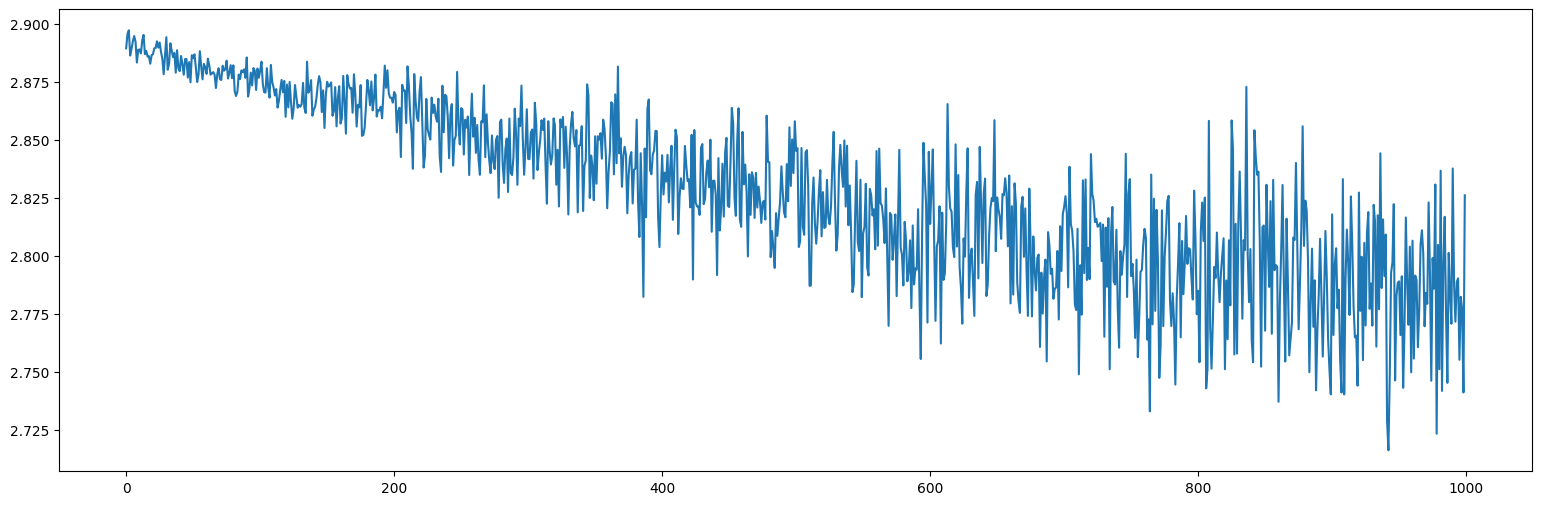

In [30]:
current_loss = 0
all_losses = []
plot_steps, print_steps = 100, 100
n_iters = 100000
wrong, right = 0, 0

# header = f"{'Iter':<6} | {'Progress':<10} | {'Loss':<10} | {'Line':<15} | {'Guess':<10} | {'Correct':<10}"
# print(header)
for i in tqdm(range(n_iters), desc='Iter'):
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
    output, loss = train_model(line_tensor, category_tensor)
    current_loss += loss
    
    # all_losses.append(current_loss/(i+1))
    if (i+1) % plot_steps == 0 :
        all_losses.append(current_loss / plot_steps)
        current_loss = 0
    
    if category == category_from_output(output):
        right += 1
    else:
        wrong += 1
    
    # if (i+1) % print_steps == 0:
    #     guess = category_from_output(output)
    #     correct = 'CORRECT' if guess == category else f"WRONG ({category})"
        
    #     # print(f"Iter: {i} | Progress: {(i+1)/n_iters*100:.0f}% | loss: {loss:.4f} | {line} | {guess} {correct}")
    #     print("-" * len(header))
        # print(f"{i:<6} | {((i+1)/n_iters*100):<10.0f}% | {loss:<10.4f} | {line:<15} | {guess:<10} | {correct:<10}")


print('Wrong:', wrong, 'Right:', right, 'Accuracy:', 100*right/(right+wrong))
plt.figure(figsize=(19,6))
plt.plot(all_losses)
plt.show()

In [31]:
def predict(input_line):
    with torch.inference_mode():
        line_tensor = line_to_tensor(input_line)
        hidden = rnn_model.init_hidden()
        
        for line in line_tensor:
            output, hidden = rnn_model(line.to(device), hidden.to(device))
        
        guess = category_from_output(output)
        # print(guess)
    return guess

In [31]:
sentence = ["Tony", "Steve", "Kwang", "Baumbach", "Palmeiro"]

for i in sentence:
    print(i, "-->", predict(i))

Tony --> English
Steve --> English
Kwang --> Korean
Baumbach --> German
Palmeiro --> Portuguese
